## Analysis of US cars market comparing the growth of 
## Ford, GM, Toyota and Tesla during the past years.

 ==========

Web scrapped originally from:

URL: https://carsalesbase.com/car-sales-us-home-main/car-sales-by-brand-us/

@author: Michel Mendonca

==========

# Web scrapping

In [4]:
import scrapy
import itertools
from itertools import chain
import csv
import pandas as pd


class project1_carsSpider(scrapy.Spider):
    name = 'project1_cars_ford'
    allowed_domains = ['Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)']
    start_urls = ['https://carsalesbase.com/us-ford/']

    def parse(self, response):
        # table : id = "table_3"
        # class_ : "responsive display nowrap data-t data-t wpDataTable dataTable no-footer"

        rows = response.css("table")[1].css('tr') # the first .css looks for the table we want and the secound .css looks for the rows
        row = rows.css('td').css('::text').getall()
        n = 4
        splited = [row[i::n] for i in range(n)]

        year = splited[3]
        sales = splited[0][1:]
        growth = splited[1][1:]
        market_share = splited[2][1:]

        zippedlist = list(zip(year, sales, growth, market_share))
        #toyota_table = pd.DataFrame(zippedlist, columns = ["Year", "Age", "Growth", "Market_Share"])
        #print(zippedlist)
        f = open('ford.csv', 'w')
        with f:
            writer = csv.writer(f)
            writer.writerows(zippedlist)

        #print(splited)

==========

I have saved one file for each company's table using the code above and reloaded into this notebook for a future join.

==========

# Exploratory Data Analysis

In [3]:
#code for extra Data Cleaning

#fordData_out = toyotaData.drop('Unnamed: 0', axis = 1) # It drops the first Unnamed column
#toyotaData_out.to_csv('Toyota_us.csv', index = False) # It saves without the first column Unnamed

In [4]:
# This code sorts the column 'Year'

#df_toyotaData = DataFrame(toyotaData)
#toyotaData_out = df_toyotaData.sort_values(['Year'], ascending=False)
#toyotaData_out.head()

In [5]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [ ]:
fordData = pd.read_csv('fordUS.csv')
#fordData.head()

In [ ]:
teslaData = pd.read_csv('teslaUS.csv')
teslaData1 = pd.read_csv('Tesla_us.csv')
#teslaData1.()

In [ ]:
gmData = pd.read_csv("gmUS.csv")
#gmData.head()

In [ ]:
toyotaData = pd.read_csv("toyotaUS.csv")
#toyotaData.head()

In [ ]:
Heads = ['Year', 'Toyota_Sales', 'Toyota_Growth', 'Toyota_Market_Share']
superDF = pd.read_csv("toyotaUS.csv", header=None, names = Heads)

In [ ]:
gmdf = gmData.columns = ['Year', 'GM_Sales', 'GM_Growth', 'GM_Market_Share']

In [ ]:
teslaDF1.columns = ['Year', 'Tesla_Sales', 'Tesla_Growth', 'Tesla_Market_Share']

In [ ]:
fordData.columns = ['Year', 'Ford_Sales', 'Ford_Growth', 'Ford_Market_Share']

In [ ]:
toyotaData.columns = ['Year', 'Toyota_Sales', 'Toyota_Growth', 'Toyota_Market_Share']


I have Joined all the DF's columns into the MainDF using this code.

In [ ]:
Ford_Market_Share = fordData["Ford_Market_Share"]
MainDF = MainDF.join(Ford_Market_Share)
MainDF.head()

In [ ]:
MainDF.to_csv('MainDF.csv', index = False) # It saves without the first column Unnamed

In [ ]:
#list(df.columns.values)

In [ ]:
#df = df[['Year', 'Toyota_Sales', 'Tesla_Sales', 'GM_Sales', 'Ford_Sales', 'Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth', 'Toyota_Market_Share', 'Tesla_Market_Share', 'GM_Market_Share', 'Ford_Market_Share' ]]

In [ ]:
#df.to_csv('MainDF.csv', index = False) # It saves without the first column Unnamed

I also had to transform all de NaN values into 0 to procedure with the further ML analysis.

In [3]:
#df_raw = pd.read_csv("MainDF.csv")
#df = df_raw.sort_values(['Year'], ascending=False)
#df.replace(np.nan, 0, inplace=True) 
#df.columns

In [26]:
df['GMToyotaFord_SalesAv'] = df[['Toyota_Sales', 'GM_Sales', 'Ford_Sales']].mean(axis=1)
df['GMToyotaFord_GrowthAv'] = df[['Toyota_Growth', 'GM_Growth', 'Ford_Growth']].mean(axis=1)
df['TotalSalesAv'] = df[['Toyota_Sales','Tesla_Sales', 'GM_Sales', 'Ford_Sales']].mean(axis=1)
df['TotalGrowthAv'] = df[['Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth']].mean(axis=1)
df = df.round(2)
df.head()

,Year,Toyota_Sales,Tesla_Sales,GM_Sales,Ford_Sales,Toyota_Growth,Tesla_Growth,GM_Growth,Ford_Growth,Toyota_Market_Share,Tesla_Market_Share,GM_Market_Share,Ford_Market_Share,GMToyotaFord_SalesAv,GMToyotaFord_GrowthAv,TotalSalesAv,TotalGrowthAv
0,2019,2085186.0,192250.0,1958783.0,2293984.0,-2.02,0.33,-3.79,-3.68,12.22,1.12,11.46,13.42,2112651.00,-3.16,1632550.75,-2.29
1,2018,2128201.0,191627.0,2036023.0,2381635.0,-0.05,282.15,-1.45,-3.34,12.28,1.11,11.75,13.74,2181953.00,-1.61,1684371.50,69.33
2,2017,2129177.0,50145.0,2065879.0,2464041.0,1.08,5.25,-1.46,-0.94,12.35,0.29,12.00,14.29,2219699.00,-0.44,1677310.50,0.98
3,2016,2106332.0,47644.0,2096508.0,2487487.0,0.37,87.46,-1.36,-0.57,12.01,0.27,11.95,14.18,2230109.00,-0.52,1684492.75,21.48
4,2015,2098545.0,25416.0,2125347.0,2501855.0,4.70,52.29,4.52,5.26,12.01,0.13,12.17,14.32,2241915.67,4.83,1687790.75,16.69


In [27]:
df.to_csv('uscars_df.csv', index = False) # It saves without the first column Unnamed

# Exploratory Data Analysis - EDA

In [6]:
df = pd.read_csv("uscars_df.csv")

In [7]:
df_Growth = df[["Year","TotalGrowthAv", "GMToyotaFord_GrowthAv",'Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth']]
df_Growth.to_csv('USGrowth10.csv', index = False)

In [8]:
df_Growth.describe()

,Year,TotalGrowthAv,GMToyotaFord_GrowthAv,Toyota_Growth,Tesla_Growth,GM_Growth,Ford_Growth
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2000.000000,3.281795,0.721538,3.152821,10.961026,-0.408974,-0.580000
std,11.401754,12.479666,6.097249,8.769463,47.388143,6.991195,7.224811
min,1981.000000,-14.590000,-19.450000,-18.850000,0.000000,-25.240000,-19.490000
25%,1990.500000,-1.190000,-1.680000,-0.625000,0.000000,-1.455000,-3.405000
50%,2000.000000,1.170000,0.440000,4.840000,0.000000,0.000000,0.000000
75%,2009.500000,3.430000,3.370000,7.430000,0.000000,0.105000,0.015000
max,2019.000000,69.330000,12.660000,26.340000,282.150000,16.830000,21.650000


In [9]:
df_Growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   39 non-null     int64  
 1   TotalGrowthAv          39 non-null     float64
 2   GMToyotaFord_GrowthAv  39 non-null     float64
 3   Toyota_Growth          39 non-null     float64
 4   Tesla_Growth           39 non-null     float64
 5   GM_Growth              39 non-null     float64
 6   Ford_Growth            39 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.3 KB


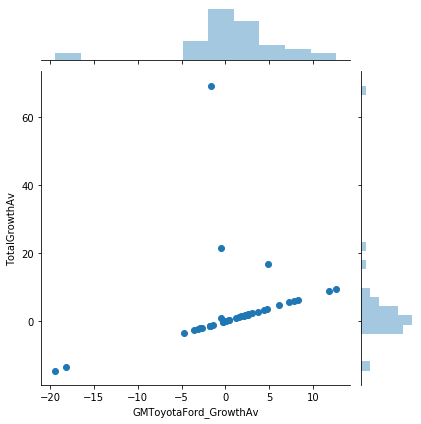

In [10]:
sns.jointplot(x = 'GMToyotaFord_GrowthAv', y = 'TotalGrowthAv', data = df_Growth)

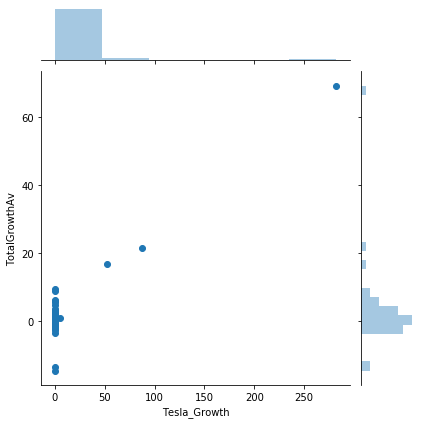

In [11]:
sns.jointplot(x = 'Tesla_Growth', y = 'TotalGrowthAv', data = df_Growth)

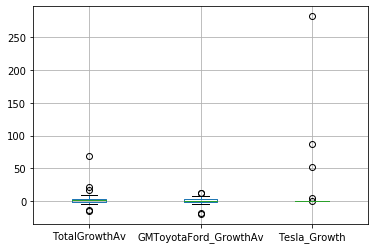

In [12]:
df_Growth.boxplot(column = ["TotalGrowthAv","GMToyotaFord_GrowthAv", "Tesla_Growth"])

In [83]:
df[["TotalGrowthAv", "GMToyotaFord_GrowthAv",'Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth']].corr()

,TotalGrowthAv,GMToyotaFord_GrowthAv,Toyota_Growth,Tesla_Growth,GM_Growth,Ford_Growth
TotalGrowthAv,1.000000,0.318051,0.190166,0.930652,0.316678,0.267721
GMToyotaFord_GrowthAv,0.318051,1.000000,0.695981,-0.050910,0.890242,0.825454
Toyota_Growth,0.190166,0.695981,1.000000,-0.068312,0.349172,0.210377
Tesla_Growth,0.930652,-0.050910,-0.068312,1.000000,-0.009993,-0.036541
GM_Growth,0.316678,0.890242,0.349172,-0.009993,1.000000,0.862294
Ford_Growth,0.267721,0.825454,0.210377,-0.036541,0.862294,1.000000


/home/michel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


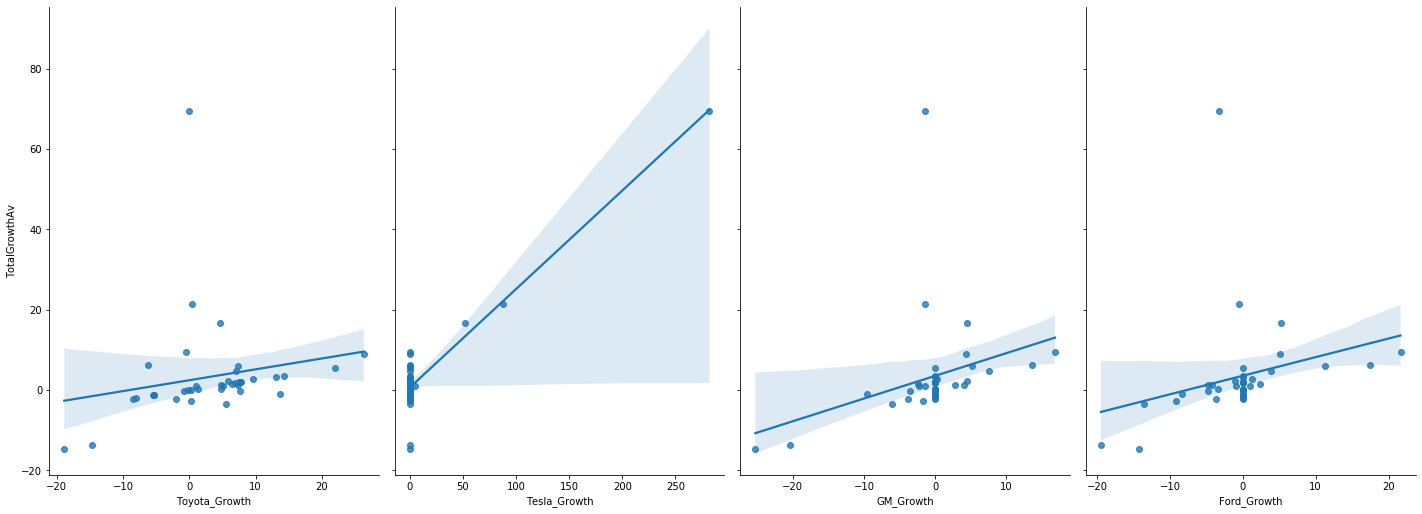

In [84]:
sns.pairplot(df_Growth, x_vars=['Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth'], y_vars='TotalGrowthAv', size=7, aspect=0.7, kind='reg')

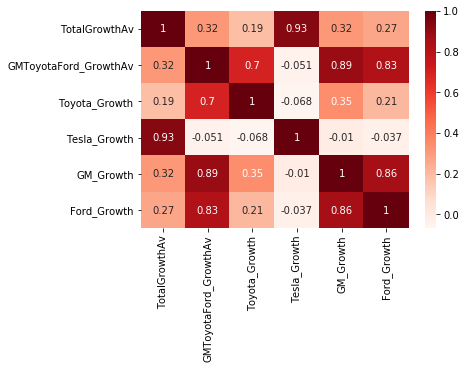

In [85]:
sns.heatmap(df_Growth[["TotalGrowthAv", "GMToyotaFord_GrowthAv",'Toyota_Growth', 'Tesla_Growth', 'GM_Growth', 'Ford_Growth']].corr(), cmap="Reds", annot=True)

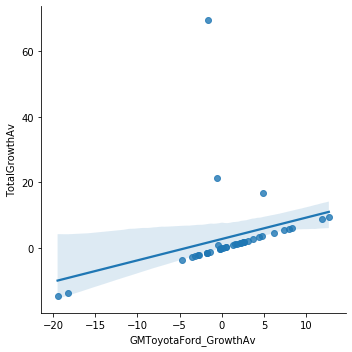

In [86]:
sns.lmplot(y = 'TotalGrowthAv', x = 'GMToyotaFord_GrowthAv', data = df_Growth)

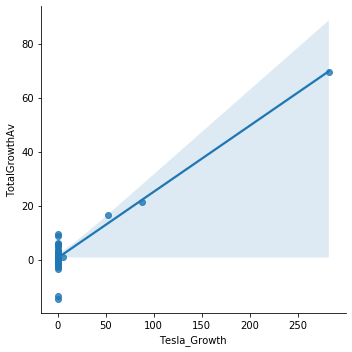

In [87]:
sns.lmplot(y = 'TotalGrowthAv', x = 'Tesla_Growth', data = df_Growth)

# ML Model building 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("USGrowth10.csv")


# choose relevant data
#df.replace(np.nan, 0, inplace=True) 
df.columns
df_Growth = df

# get dummy data
df_dumGrowth = pd.get_dummies(df_Growth)

In [3]:
df_dumGrowth.columns

Index(['Year', 'TotalGrowthAv', 'GMToyotaFord_GrowthAv', 'Toyota_Growth',
       'Tesla_Growth', 'GM_Growth', 'Ford_Growth'],
      dtype='object')

In [4]:
# train test split

from sklearn.model_selection import train_test_split

a = df_dumGrowth.drop('Year', axis =1)
XGrowth = a
yGrowth = a['TotalGrowthAv'].values

XGrowth_train, XGrowth_test, yGrowth_train, yGrowth_test = train_test_split(XGrowth, yGrowth, test_size=0.2, random_state=42)

In [5]:
# multiple linear regression

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

XGrowth_sm = XGrowth = sm.add_constant(XGrowth)
modelGrowth = sm.OLS(yGrowth,XGrowth_sm)
modelGrowth.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.112e+27
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:54:02   Log-Likelihood:                 1054.0
No. Observations:                  39   AIC:                            -2094.
Df Residuals:                      32   BIC:                            -2082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.772e-16   8.84e-14     -0.009      0.993   -1.81e-13    1.79e-13
TotalGrowthAv             1.0000   2.32e-11   4.31e+10      0.000       1.000       1.000
GMToyotaFord_GrowthAv          0   3.13e-11          0      1.000   -6.38e-11    6.38e-11
Toyota_Growth         -1.421e-14   1.31e-11     -0.001      0.999   -2.67e-11    2.67e-11
Tesla_Growth          -1.776e-15    5.8e-12     -0.000      1.000   -1.18e-11    1.18e-11
GM_Growth                      0   1.31e-11          0      1.000   -2.67e-11    2.67e-11
Ford_Growth                    0   1.31e-11          0      1.000   -2.67e-11    2.67e-11
==============================================================================
Omnibus:                       69.008   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.459
Skew:                          -4.218   Prob(JB):                    1.22e-165
Kurtosis:                      22.904   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
lmGrowth = LinearRegression()
lmGrowth.fit(XGrowth_train, yGrowth_train)
np.mean(cross_val_score(lmGrowth,XGrowth_train,yGrowth_train, scoring = 'neg_mean_absolute_error', cv=5))

-3.1180745816005216e-15

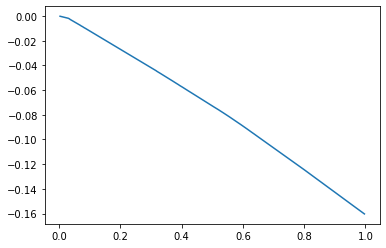

In [7]:
# lasso regression GROWTH

lm_lGrowth = Lasso(alpha=.01)
lm_lGrowth.fit(XGrowth_train,yGrowth_train)
np.mean(cross_val_score(lm_lGrowth,XGrowth_train,yGrowth_train))

alphaGrowth = []
errorGrowth = []

for i in range(1,300):
    alphaGrowth.append(i/300)
    lml = Lasso(alpha=(i/300))
    errorGrowth.append(np.mean(cross_val_score(lml,XGrowth_train,yGrowth_train, scoring = 'neg_mean_absolute_error', cv=5)))
    
plt.plot(alphaGrowth,errorGrowth)

In [9]:
err = tuple(zip(alphaGrowth,errorGrowth))
df_errGrowth = pd.DataFrame(err, columns = ['alpha','error'])
df_errGrowth[df_errGrowth.error == max(df_errGrowth.error)]

,alpha,error
0,0.003333,-0.000204


In [10]:
# random forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,XGrowth_train,yGrowth_train,scoring = 'neg_mean_absolute_error', cv= 3))

-3.7015093939393933

In [11]:
# tune models GrindsearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gsGrowth = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gsGrowth.fit(XGrowth_train,yGrowth_train)
gsGrowth.best_score_
gsGrowth.best_estimator_

RandomForestRegressor(n_estimators=120)

In [12]:
# test ensembles
from sklearn.metrics import mean_absolute_error

tpred_lmGrowth = lmGrowth.predict(XGrowth_test)
tpred_lmlGrowth = lm_lGrowth.predict(XGrowth_test)
tpred_rfGrowth = gsGrowth.best_estimator_.predict(XGrowth_test)
mean_absolute_error(yGrowth_test,tpred_lmGrowth)

3.119032809806299e-15

In [13]:
mean_absolute_error(yGrowth_test,tpred_lmlGrowth)

0.00020406975146441443

In [14]:
mean_absolute_error(yGrowth_test,tpred_rfGrowth)

0.5049270833333315

In [15]:
mean_absolute_error(yGrowth_test,(tpred_lmGrowth+tpred_rfGrowth)/2)

0.252463541666665

In [16]:
from sklearn.metrics import r2_score
r2_score(yGrowth_test,tpred_lmGrowth)

1.0

In [ ]:
# Creating interactive API

import pickle
pickl = {'model': gsGrowth.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(XGrowth_test.iloc[1,:])).reshape(1,-1))[0]

list(XGrowth_test.iloc[1,:])